In [88]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [10]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [11]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [12]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [13]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [14]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [125]:
#Finding the last date in the database
prcp_daily = session.query(func.strftime("%Y-%m-%d",Measurement.date), func.sum(Measurement.prcp))\
            .filter(Measurement.date.between('2017-01-01','2017-08-14')).group_by(Measurement.date)\
            .order_by(Measurement.date).all()
prcp_daily[-1]
#Last date = 2017-08-14

('2017-08-14', 0.31)

In [126]:
# Perform a query to retrieve the data and precipitation scores
dates = [i[0] for i in prcp_daily]
precipitation = [(i[1]) for i in prcp_daily]
print(dates[:5],'\n', precipitation[:5])

['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04', '2017-01-05'] 
 [0.35, 0.02, 0.0, 0.18, 0.95]


In [127]:
# Save the query results as a Pandas DataFrame and set the index to the date column/Sort the dataframe by date.
prcp_daily_df = pd.DataFrame(prcp_each_day, columns=['dates', 'precipitation'])
prcp_daily_df.set_index(['dates'], inplace=True)
prcp_daily_df.head()


,precipitation
dates,
2016-08-14,1.02
2016-08-15,1.35
2016-08-16,1.09
2016-08-17,0.61
2016-08-18,0.22


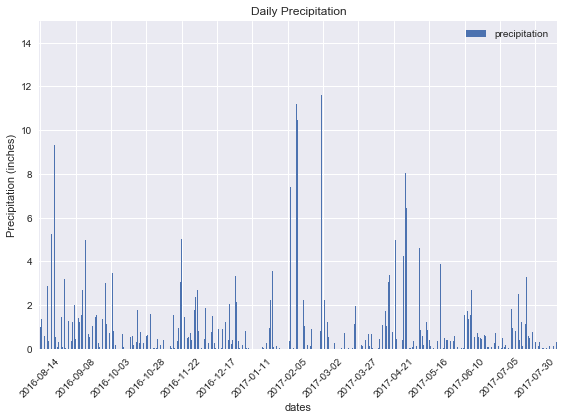

In [135]:
# Use Pandas Plotting with Matplotlib to plot the data
ax = prcp_daily_df.plot(kind='bar', figsize=(8,6))
n = 25
plt.ylabel('Precipitation (inches)')
plt.title('Daily Precipitation')
#xticks = ax.xaxis.get_ticklocs()
#xticklabels = [tick.get_text() for tick in ax.xaxis.get_ticklabels()]
ax.set_xticks(xticks[::n])
ax.set_xticklabels(xticklabels[::n], rotation=45)
plt.tight_layout()                           
plt.show()

![precipitation](Images/precipitation.png)

In [136]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_daily_df.describe()

,precipitation
count,366.000000
mean,1.010027
std,1.791611
min,0.000000
25%,0.060000
50%,0.410000
75%,1.130000
max,14.280000


![describe](Images/describe.png)

In [137]:
# Design a query to show how many stations are available in this dataset?
total_stations = session.query(func.count(Station.station)).all()
print('There are total',total_stations[0],'stations')

There are total (9,) stations


In [35]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
active_stations = session.query(Measurement.station ,func.count(Measurement.station)).\
                    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
    
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [71]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
most_active = session.query(Measurement.tobs).\
                    filter(Measurement.station == active_stations[0][0]).\
                    filter(Measurement.date.between('2016-08-14','2017-08-14')).\
                    order_by(Measurement.tobs.desc()).all()
Min = np.min(most_active)
Max = np.max(most_active)
Avg = np.mean(most_active)
print("The lowest recorded temperature at the most active station was ", Min, " degrees farenheit.")
print("The highest recorded temperature at the most active station was ", Max, " degrees farenheit.")
print("The average recorded temperature at the most active station was ", Avg, " degrees farenheit.")
# the number of reports from the most active station# the nu 
temps_maxact = session.query(Measurements.station, Measurements.tobs).filter(Measurements.station == max_activity[0], Measurements.date > year_before).all()

The lowest recorded temperature at the most active station was  59.0  degrees farenheit.
The highest recorded temperature at the most active station was  82.0  degrees farenheit.
The average recorded temperature at the most active station was  73.30684931506849  degrees farenheit.


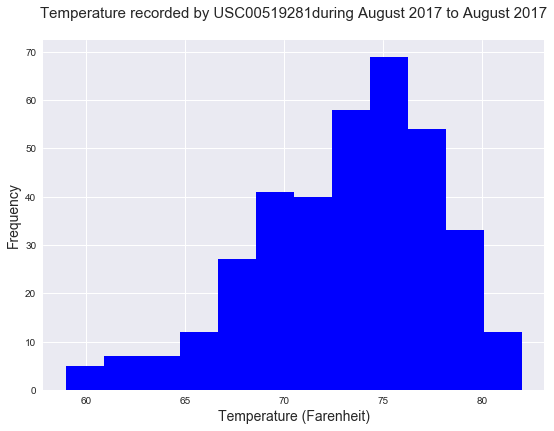

In [140]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
# #unpacking tuple format from most_active list to plot graph
most_active_tobs = [float(i[0]) for i in most_active]
most_active_tobs[:5]

sns.set()
plt.figure(figsize=(8,6))
plt.hist(most_active_tobs, bins=12, color='blue')
plt.title('Temperature recorded by '+ active_stations[0][0] + ' during August 2017 to August 2017\n', fontsize = 15)
plt.ylabel('Frequency', fontsize = 14)
plt.xlabel('Temperature (Farenheit)', fontsize = 14)
plt.show()


![precipitation](Images/station-histogram.png)

In [96]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [113]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
trip_dates = calc_temps('2017-04-26','2017-05-6')
print(trip_dates)

[(58.0, 74.62135922330097, 87.0)]


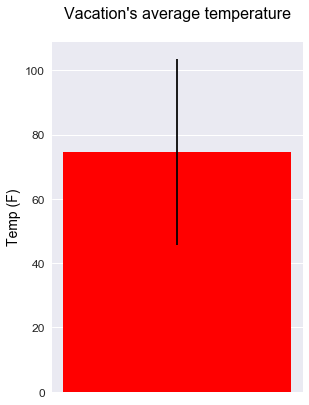

In [114]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
sns.set()
plt.figure(figsize=(4,6)) 
plt.bar(95, 74.62, color='red', width=0.2, yerr = 87.0-58.0)
plt.xticks([]*0)
plt.yticks(fontsize = 12)
plt.title('Average Vacation\'s Temperature\n', fontsize=16, color='black')
plt.ylabel('Temp (F)', fontsize = 14,color='black')
# plt.legend('tobs',loc=1)
plt.show()

In [123]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
prcp_per_station = session.query((Measurement.station), (Station.name), (Station.latitude), (Station.longitude), (Station.elevation), func.sum(Measurement.prcp))\
            .filter(Measurement.date.between('2017-04-26','2017-05-06')).group_by(Measurement.station)\
            .order_by(Measurement.date).all()
prcp_per_station

[('USC00517948',
  'MANOA LYON ARBO 785.2, HI US',
  21.3331,
  -157.8025,
  152.4,
  None),
 ('USC00513117',
  'MANOA LYON ARBO 785.2, HI US',
  21.3331,
  -157.8025,
  152.4,
  39.33000000000002),
 ('USC00514830',
  'MANOA LYON ARBO 785.2, HI US',
  21.3331,
  -157.8025,
  152.4,
  25.560000000000027),
 ('USC00516128',
  'MANOA LYON ARBO 785.2, HI US',
  21.3331,
  -157.8025,
  152.4,
  20.430000000000017),
 ('USC00519281',
  'MANOA LYON ARBO 785.2, HI US',
  21.3331,
  -157.8025,
  152.4,
  22.770000000000003),
 ('USC00519397',
  'MANOA LYON ARBO 785.2, HI US',
  21.3331,
  -157.8025,
  152.4,
  11.429999999999998),
 ('USC00519523',
  'MANOA LYON ARBO 785.2, HI US',
  21.3331,
  -157.8025,
  152.4,
  68.75999999999996)]

## Optional Challenge Assignment

In [20]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [21]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


[(62.0, 69.15384615384616, 77.0),
 (60.0, 69.39622641509433, 77.0),
 (62.0, 68.9090909090909, 77.0),
 (58.0, 70.0, 76.0),
 (56.0, 67.96428571428571, 76.0),
 (61.0, 68.96491228070175, 76.0),
 (57.0, 68.54385964912281, 76.0)]

In [22]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


,tmin,tavg,tmax
date,,,
2018-01-01,62.0,69.153846,77.0
2018-01-02,60.0,69.396226,77.0
2018-01-03,62.0,68.909091,77.0
2018-01-04,58.0,70.000000,76.0
2018-01-05,56.0,67.964286,76.0


<IPython.core.display.Javascript object>


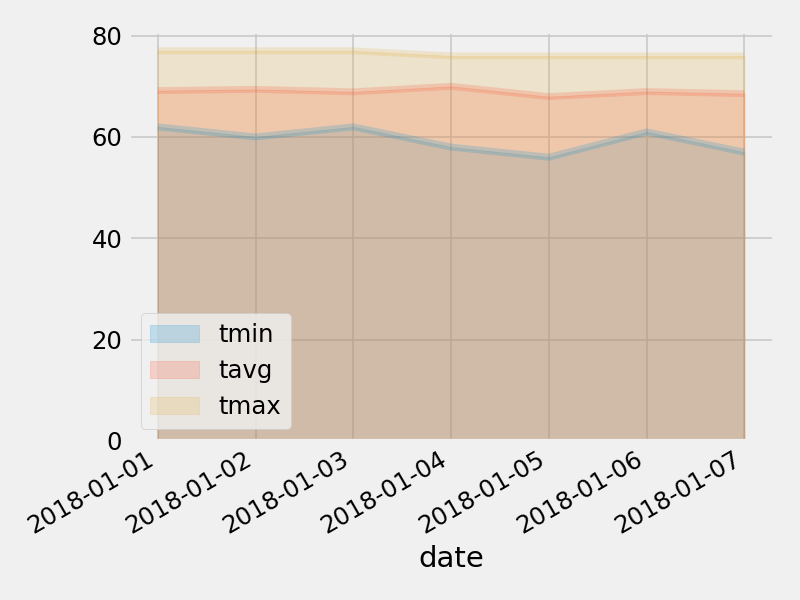

In [23]:
# Plot the daily normals as an area plot with `stacked=False`
